In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

In [13]:
df = pd.read_csv('2020_rws.csv')
df2 = pd.read_csv('2021_rws.csv')

In [14]:
df.head()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employer�s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer�s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer�s workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer�s workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer�s workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer�s workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employer�s workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer�s workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer�s workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employer�s workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [15]:
df2.head()

,Response ID,What year were you born?,What is your gender?,"How long have you been in your current job? If you have more than one job, please answer all questions for your main job.",Which of the following best describes your industry?,Which of the following best describes your current occupation?,How many people are currently employed by your organisation?,Which of the following best describes your household?,Metro or Regional,"Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year? This means October-December 2020 If you work a 5 day week, each day of remote working equals 20% of your time.",...,How strongly do you agree or disagree with the following statements? - Offering remote work helps me retain employees,How strongly do you agree or disagree with the following statements? - Offering remote work helps me to recruit employees,How strongly do you agree or disagree with the following statements? - My team works well together when they work remotely,How strongly do you agree or disagree with the following statements? - I find it easy to manage employees remotely (e.g. tasking and monitoring progress),How strongly do you agree or disagree with the following statements? - I find it easy to manage poor performers remotely,How strongly do you agree or disagree with the following statements? - I feel well-prepared to manage employees remotely,How strongly do you agree or disagree with the following statements? - Managing people remotely makes me more focused on results,How strongly do you agree or disagree with the following statements? - I find it easy to contact my employees when they work remotely,"This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour. Please compare your productivity when you work remotely to when you work at your employer's workplace. Roughly how productive are you, each hour, when you work remotely?","Now think about the productivity of the employees you manage. Roughly how productive are the employees you manage, each hour, when they work remotely?"
0,1,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote wor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm 50% more productive when working remotely ...,NaN
1,2,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm 50% more productive when working remotely ...,NaN
2,3,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My productivity is about same when I work remo...,NaN
3,4,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I'm 50% more productive when working remotely ...,I'm 50% more productive when working remotely ...
4,5,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm 20% more productive when working remotely,NaN


Text(0.5, 1.0, 'Percentage of Time Working Remotely in 2019')

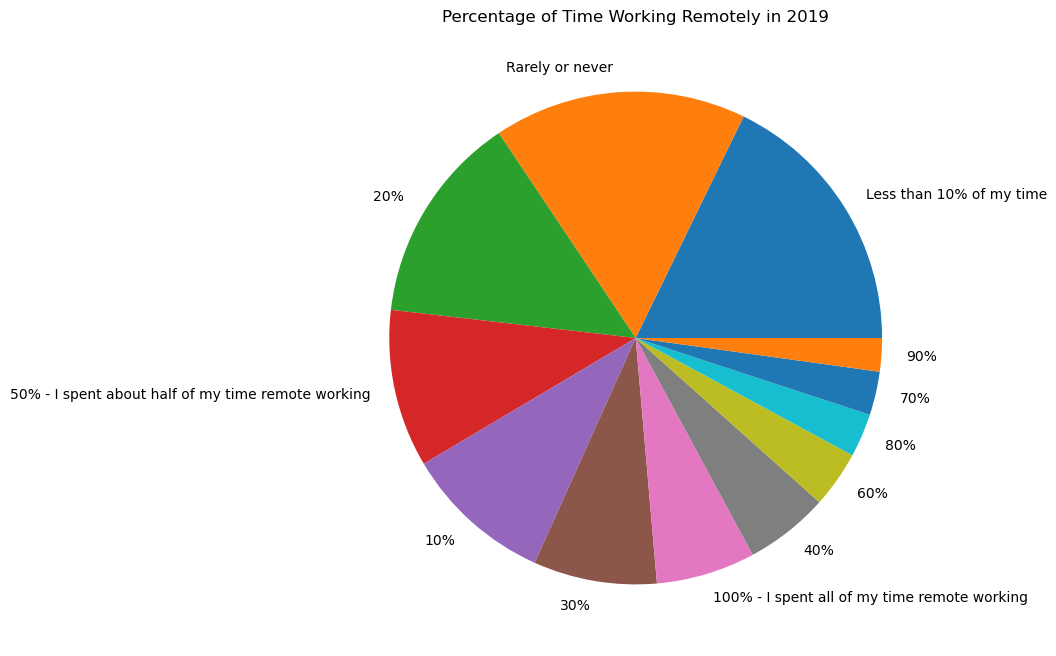

In [16]:
column = 'Thinking about your current job, how much of your time did you spend remote working last year?'
filtered_df = df.dropna(subset = [column])
count = filtered_df[column].value_counts()

plt.figure(figsize = (8, 8))
plt.pie(count, labels = count.index)
plt.title('Percentage of Time Working Remotely in 2019')

Text(0.5, 1.0, 'Percentage of Time Working Remotely in 2020')

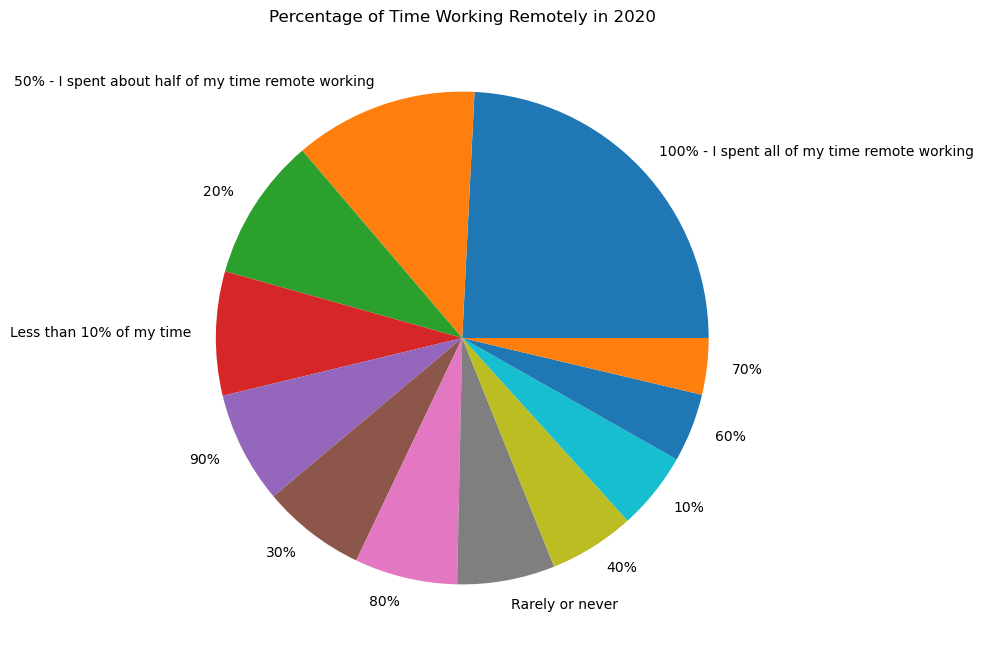

In [17]:
column = 'Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  '
filtered_df = df2.dropna(subset = [column])
count = filtered_df[column].value_counts()

plt.figure(figsize = (8, 8))
plt.pie(count, labels = count.index)
plt.title('Percentage of Time Working Remotely in 2020')

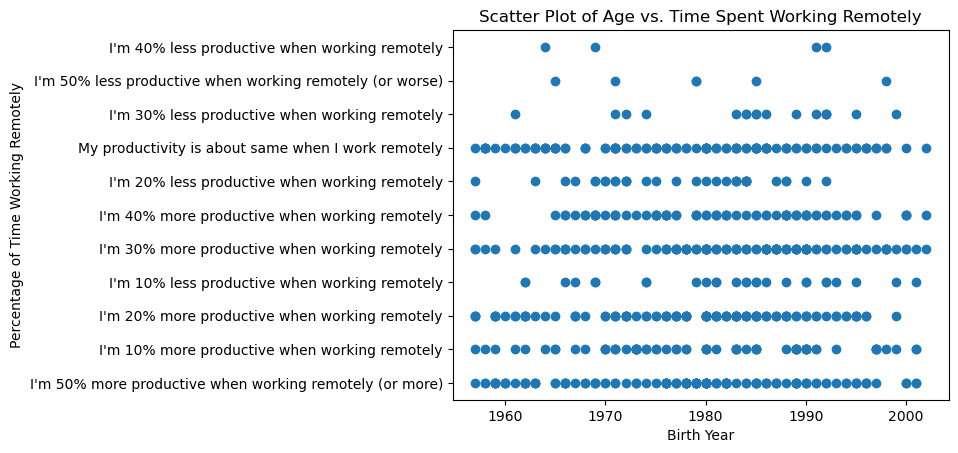

In [33]:
plt.scatter(df2['What year were you born?  '], df2["This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.    Please compare your productivity when you work remotely to when you work at your employer's workplace.    Roughly how productive are you, each hour, when you work remotely?  "])
plt.xlabel('Birth Year')
plt.ylabel('Percentage of Time Working Remotely')
plt.title('Scatter Plot of Age vs. Time Spent Working Remotely')
plt.show()

In [34]:
def convert_to_numeric(value):
    if isinstance(value, str):
        try:
            if 'more' in value:
                return int(value.split('%')[0].split()[-1])
            elif 'less' in value:
                return -int(value.split('%')[0].split()[-1])
            elif 'same' in value:
                return 0
        except ValueError:
            pass
    return np.nan

df2['Productivity_numeric'] = df2['Now think about the productivity of the employees you manage.   Roughly how productive are the employees you manage, each hour, when they work remotely?  '].apply(convert_to_numeric)
df2.dropna(subset=['Productivity_numeric'], inplace=True)

print(df2['Productivity_numeric'].unique())


[ 50  10  20 -10  30  40 -20   0 -30 -50 -40]


In [36]:
from sklearn.linear_model import LinearRegression

x = df2["This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.    Please compare your productivity when you work remotely to when you work at your employer's workplace.    Roughly how productive are you, each hour, when you work remotely?  "]
y = df2['Now think about the productivity of the employees you manage.   Roughly how productive are the employees you manage, each hour, when they work remotely?  ']

# Convert x and y to numeric
x_numeric = x.apply(convert_to_numeric)
y_numeric = y.apply(convert_to_numeric)

# Remove NaN values
df2.dropna(subset=['Productivity_numeric'], inplace=True)

# Reshape x and y for sklearn
X = x_numeric.values.reshape(-1, 1)
y = y_numeric.values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: -3.552713678800501e-15
Coefficient: [1.]


Interpretation:
* Intercept: The predicted value of the dependent variable (y) when the independent variables(x) are 0 is very small.
* Coefficient: Linear relationship between the two variables (increase by 1 for both on average).

In [11]:
print(df.columns)

Index(['Response ID', 'What year were you born?', 'What is your gender?',
       'Which of the following best describes your industry?',
       'Which of the following best describes your industry? (Detailed)',
       'Which of the following best describes your current occupation?',
       'Which of the following best describes your current occupation? (Detailed)',
       'How many people are currently employed by your organisation?',
       'Do you manage people as part of your current occupation?',
       'Which of the following best describes your household?',
       'How long have you been in your current job?', 'Metro / Regional',
       'Thinking about your current job, how much of your time did you spend remote working last year?',
       'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely',
       'Thinking about remote working last year, how strongly do you agree or 

In [10]:
print(df2.columns)

Index(['Response ID', 'What year were you born?  ', 'What is your gender?  ',
       'How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.  ',
       'Which of the following best describes your industry?  ',
       'Which of the following best describes your current occupation?  ',
       'How many people are currently employed by your organisation?   ',
       'Which of the following best describes your household?  ',
       'Metro or Regional',
       'Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.  ',
       ...
       'How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees',
       'How strongly do you agree or disagree with the following statements?    - Offe